In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
import statsmodels.api as sm

In [4]:
titrain_df = r"C:\Users\balaj\Desktop\Log Reg Data\Titanictrain.csv"

In [5]:
titrain_df = pd.read_csv(titrain_df)

In [7]:
titrain_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
titrain_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titrain_df.isnull()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


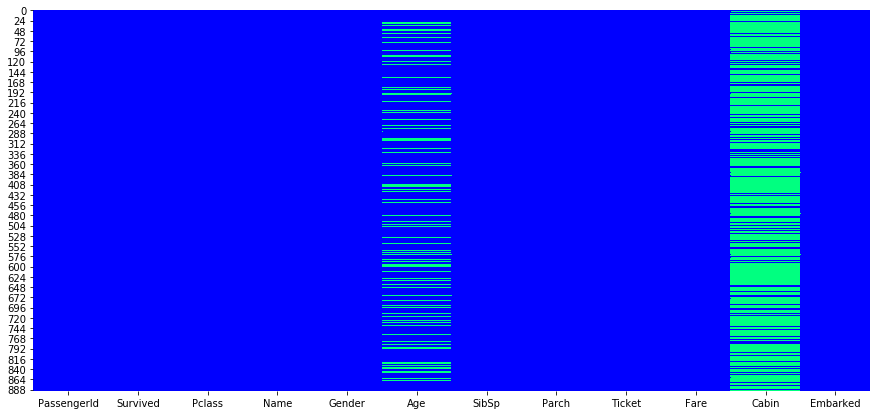

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(titrain_df.isnull(),cbar=False,cmap='winter')

In [11]:
((titrain_df.isna().sum()/len(titrain_df)*100).round(2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Gender          0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [12]:
((titrain_df.isna().sum()/len(titrain_df)*100).round(2)).astype('str')+'%'

PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Gender           0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

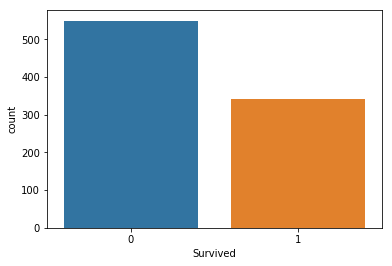

In [13]:
sns.countplot(titrain_df.Survived)

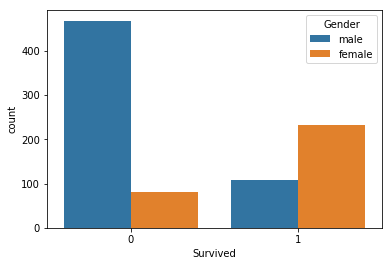

In [14]:
sns.countplot(x='Survived',hue='Gender',data=titrain_df)

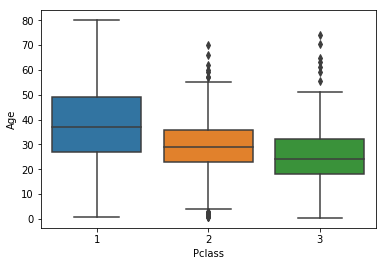

In [15]:
sns.boxplot(y='Age',x='Pclass',data =titrain_df)

In [16]:
titrain_df[titrain_df.Pclass==1].Age.isna().sum()

30

In [17]:
titrain_df[titrain_df.Pclass==2].Age.isna().sum()

11

In [18]:
titrain_df[titrain_df.Pclass==3].Age.isna().sum()

136

In [19]:
titrain_df[titrain_df.Age.isna()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [20]:
titrain_df['Age'].fillna(titrain_df.groupby('Pclass')['Age'].transform('mean'),inplace=True)

In [118]:
titrain_df['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
5      25.14062
6      54.00000
7       2.00000
8      27.00000
9      14.00000
10      4.00000
11     58.00000
12     20.00000
13     39.00000
14     14.00000
15     55.00000
16      2.00000
17     29.87763
18     31.00000
19     25.14062
20     35.00000
21     34.00000
22     15.00000
23     28.00000
24      8.00000
25     38.00000
26     25.14062
27     19.00000
28     25.14062
29     25.14062
         ...   
861    21.00000
862    48.00000
863    25.14062
864    24.00000
865    42.00000
866    27.00000
867    31.00000
868    25.14062
869     4.00000
870    26.00000
871    47.00000
872    33.00000
873    47.00000
874    28.00000
875    15.00000
876    20.00000
877    19.00000
878    25.14062
879    56.00000
880    25.00000
881    33.00000
882    22.00000
883    28.00000
884    25.00000
885    39.00000
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, 

In [21]:
titrain_df.drop('Cabin',axis=1,inplace=True)

In [22]:
titrain_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C


In [23]:
titrain_df.dropna(inplace=True)

In [24]:
titrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Gender         889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
titrain_df.shape

(889, 11)

In [26]:
titrain_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032411,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.055278,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.400919,0.081656,0.016824,-0.548193
Age,0.032411,-0.055278,-0.400919,1.000000,-0.242737,-0.174818,0.118050
SibSp,-0.057686,-0.034040,0.081656,-0.242737,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174818,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.118050,0.160887,0.217532,1.000000


In [27]:
tit= titrain_df.corr()
#titrain_df.corr.style.background_gradient(cmap = 'winter')
tit

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032411,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.055278,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.400919,0.081656,0.016824,-0.548193
Age,0.032411,-0.055278,-0.400919,1.000000,-0.242737,-0.174818,0.118050
SibSp,-0.057686,-0.034040,0.081656,-0.242737,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174818,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.118050,0.160887,0.217532,1.000000


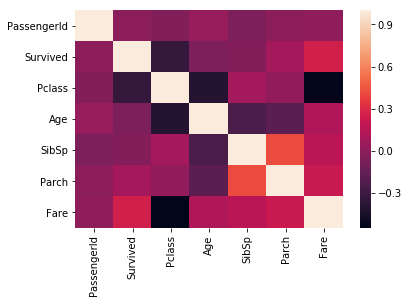

In [28]:
sns.heatmap(titrain_df.corr())

In [29]:
pd.get_dummies(titrain_df['Gender']).head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [30]:
pd.get_dummies(titrain_df['Embarked']).head(10)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [31]:
Gender = pd.get_dummies(titrain_df['Gender'],prefix='Gender',drop_first=True)
embark = pd.get_dummies(titrain_df['Embarked'],prefix='Embarked',drop_first=True)

In [32]:
Gender

,Gender_male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [33]:
embark

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [34]:
var= pd.concat([titrain_df,Gender,embark],axis=1)

In [36]:
var

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C,0,0,0


In [37]:
titrain_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C


In [38]:
var.drop('PassengerId',axis=1,inplace=True)

In [39]:
var.drop('Gender',axis=1,inplace=True)

In [40]:
var.drop('Ticket',axis=1,inplace=True)

In [41]:
var.drop('Embarked',axis=1,inplace=True)

In [42]:
var.drop('Name',axis=1,inplace=True)

In [44]:
var

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
5,0,3,25.14062,0,0,8.4583,1,1,0
6,0,1,54.00000,0,0,51.8625,1,0,1
7,0,3,2.00000,3,1,21.0750,1,0,1
8,1,3,27.00000,0,2,11.1333,0,0,1
9,1,2,14.00000,1,0,30.0708,0,0,0


In [45]:
var.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [46]:
feature_columns = ['Pclass','Age','SibSp','Parch','Gender_male','Embarked_Q','Embarked_S']
x = var[feature_columns]
y = var['Survived']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(var.drop('Survived',axis=1),var['Survived'],test_size=0.30,random_state=101)


In [48]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

pred_train = logmodel.predict(x_train)
pred_test = logmodel.predict(x_test)


In [49]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

In [50]:
pred_train

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [51]:
x_train.shape

(622, 8)

In [52]:
y_train.shape

(622,)

In [54]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
807,3,18.00000,0,0,7.775,0,0,1
651,2,18.00000,0,1,23.000,0,0,1
2,3,26.00000,0,0,7.925,0,0,1
690,1,31.00000,1,0,57.000,1,0,1
196,3,25.14062,0,0,7.750,1,1,0


In [55]:
logmodel.intercept_

array([3.52346919])

In [56]:
logmodel.coef_

array([[-0.78544563, -0.02616502, -0.21717006, -0.08743285,  0.00468494,
        -2.32085878, -0.00815135, -0.17358335]])

In [58]:
logmodel.predict_proba(x_train)[:,1]

array([0.63622202, 0.79056672, 0.58671128, 0.37339886, 0.14388695,
       0.5133893 , 0.9855496 , 0.65392079, 0.59172844, 0.92427901,
       0.31701378, 0.10397998, 0.31086765, 0.11908873, 0.10319851,
       0.14388695, 0.11458813, 0.13705378, 0.54834881, 0.09689076,
       0.12475812, 0.89747753, 0.79171168, 0.51753793, 0.91229736,
       0.91530528, 0.12442813, 0.05591961, 0.23128596, 0.11834582,
       0.51239545, 0.09926912, 0.59229423, 0.46315167, 0.20916711,
       0.14459194, 0.15505539, 0.75162131, 0.40752026, 0.13972432,
       0.10486452, 0.61396419, 0.57686148, 0.60225676, 0.81006857,
       0.65780324, 0.54277412, 0.11152386, 0.93732296, 0.1209494 ,
       0.14970951, 0.1663727 , 0.79997541, 0.13716231, 0.14388695,
       0.11490506, 0.10392727, 0.11403851, 0.24589389, 0.90095248,
       0.10643962, 0.11914576, 0.13409501, 0.37444816, 0.14433597,
       0.08874995, 0.26503676, 0.9143768 , 0.58663085, 0.15039939,
       0.14545357, 0.21262546, 0.14998277, 0.37246781, 0.12483

In [59]:
np.where(logmodel.predict_proba(x_train)[:,1] > 0.7 , 1,0)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [61]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

In [64]:
print(classification_report(y_train,pred_train))
print('Accuracy :', accuracy_score(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       386
           1       0.76      0.69      0.72       236

   micro avg       0.80      0.80      0.80       622
   macro avg       0.79      0.78      0.78       622
weighted avg       0.80      0.80      0.80       622

Accuracy : 0.8006430868167203


In [65]:
print(classification_report(y_test,pred_test))
print('Accuracy :',accuracy_score(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

Accuracy : 0.8089887640449438


In [67]:
cnf_matrix = confusion_matrix(y_true=y_train,y_pred=pred_train)

cm = pd.DataFrame(cnf_matrix)

cm

,0,1
0,336,50
1,74,162


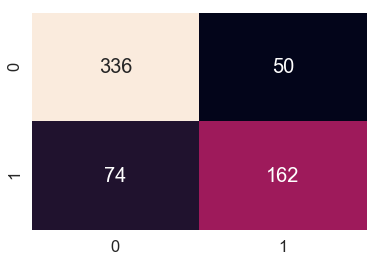

In [69]:
sns.set(font_scale=1.5) #for label size
sns.heatmap(cm,annot=True,fmt='g',annot_kws={'size':20},cbar=False)

In [70]:
FPR, TPR , _ =roc_curve(y_train,pred_train) 

In [71]:
FPR1, TPR1, _1 = roc_curve(y_test,pred_test)

In [72]:
roc_auc = auc(FPR,TPR)
print('ROC AUC : %0.3f' % roc_auc)

roc_auc1 = auc(FPR1,TPR1)
print('ROC AUC : %0.3f' % roc_auc1)

ROC AUC : 0.778
ROC AUC : 0.781


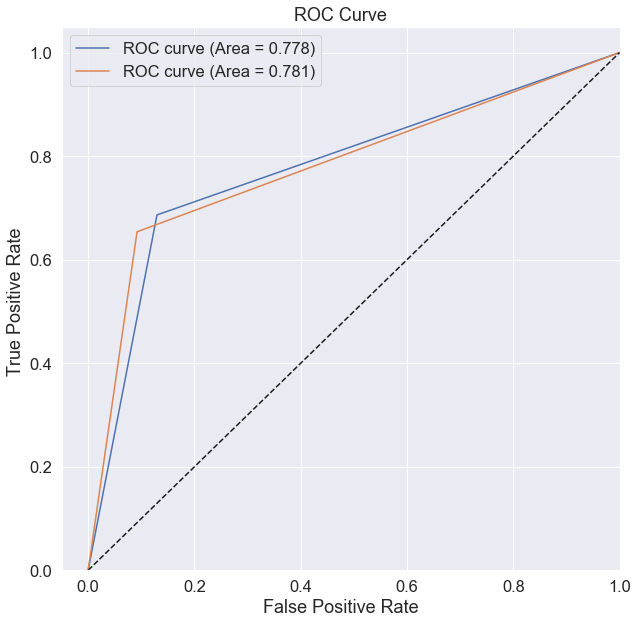

In [73]:
plt.figure(figsize=(10,10))
plt.plot(FPR,TPR,label = 'ROC curve (Area = %0.3f)' % roc_auc)
plt.plot(FPR1,TPR1,label = 'ROC curve (Area = %0.3f)'% roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('ROC Curve')
plt.legend(loc =0)
plt.show()

In [76]:
plt.xlim?

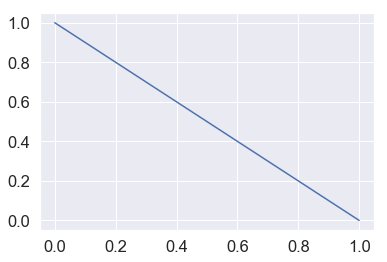

In [75]:
plt.plot([1,0])